In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\Data_Train\Diabetes_Analysis\diabetes_cleaned.csv")
""" Data Cleaned by power Query for fast Analysis """

' Data Cleaned by power Query for fast Analysis '

## Explore Data

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [4]:
df.isna().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
"""plt.figure(figsize=(10,15))
i=1
for col in df :
    plt.subplot(5,2,i)
    sns.histplot(data=df,x=col,hue="Outcome",bins=50,kde=True,palette="YlOrRd")
    i+=1
plt.tight_layout()
plt.show()"""

'plt.figure(figsize=(10,15))\ni=1\nfor col in df :\n    plt.subplot(5,2,i)\n    sns.histplot(data=df,x=col,hue="Outcome",bins=50,kde=True,palette="YlOrRd")\n    i+=1\nplt.tight_layout()\nplt.show()'

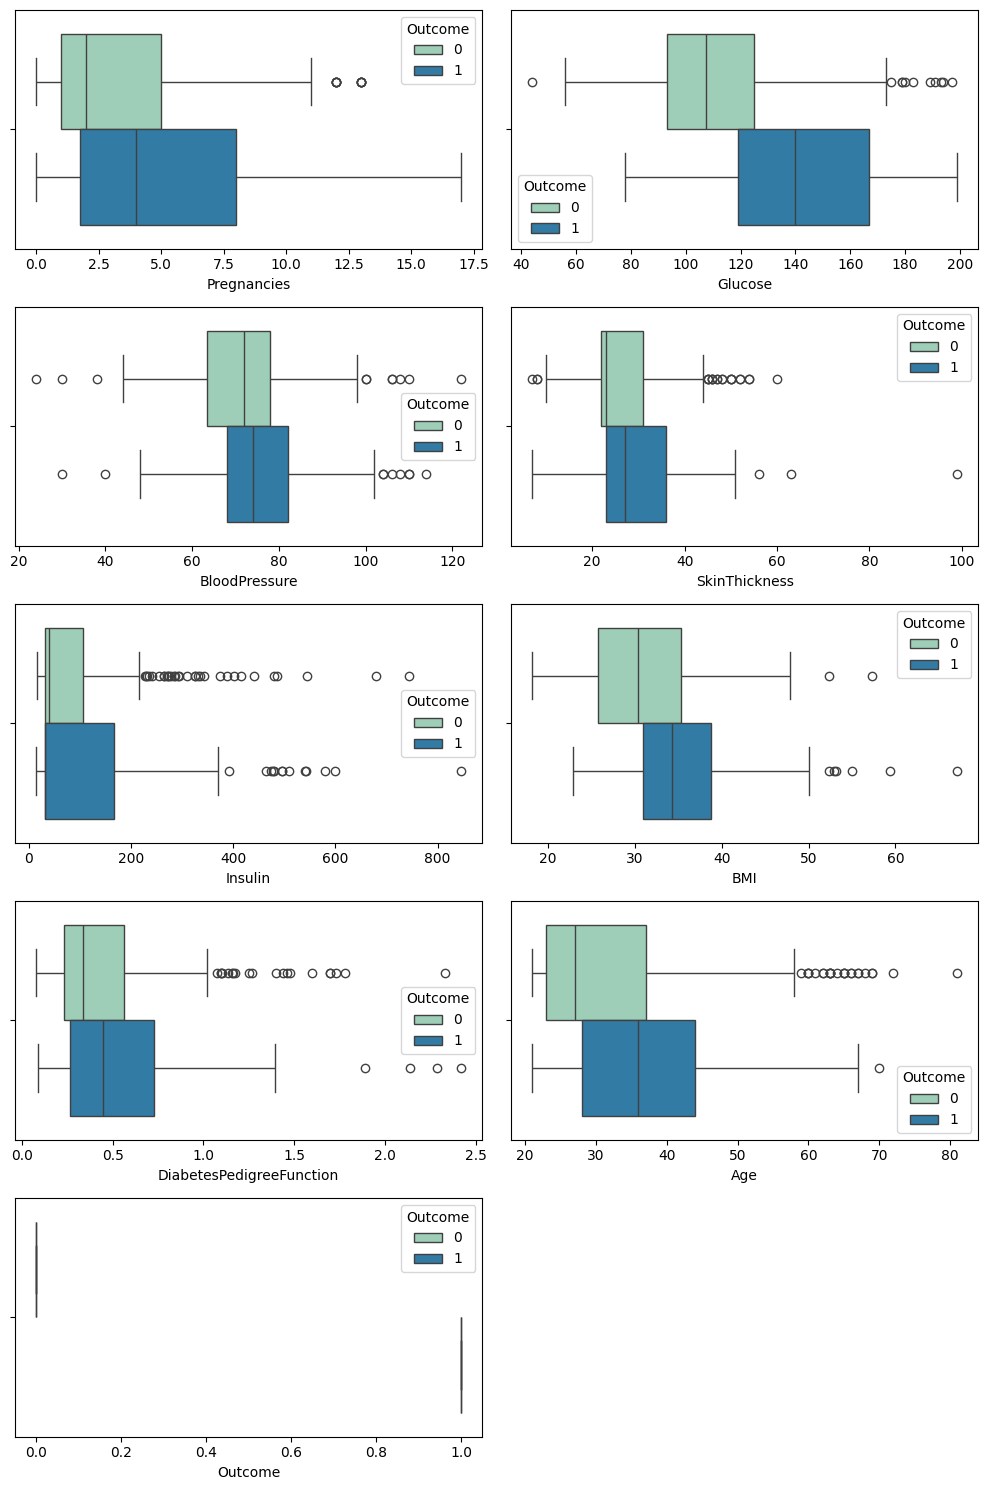

In [9]:
plt.figure(figsize=(10,15))
i=1
for col in df :
    plt.subplot(5,2,i)
    sns.boxplot(data=df,x=col,hue="Outcome",palette="YlGnBu")
    i+=1
plt.tight_layout()
plt.show()

## Outliers

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
def outlier (col):
    q1 , q3 = np.percentile(df[col],[25,75])
    IQR = q3-q1
    low = q1-1.5*IQR
    high = 1.5*IQR + q3
    outliers = df[(df[col]<low) | (df[col]>high)]
    df[col]=np.where((df[col]<low) | (df[col]>high),
             df[col].median(),
             df[col])
    print (f"Number of Outliers in {col} is {len(outliers)}")

In [12]:
Have_outliers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in Have_outliers :
    outlier(i)

Number of Outliers in Glucose is 0
Number of Outliers in BloodPressure is 14
Number of Outliers in SkinThickness is 35
Number of Outliers in Insulin is 49
Number of Outliers in BMI is 8
Number of Outliers in DiabetesPedigreeFunction is 29
Number of Outliers in Age is 9


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.108073,26.278646,70.755534,32.198958,0.427667,32.760417,0.348958
std,3.369578,30.438286,10.874178,7.493445,59.661471,6.410558,0.245162,11.055385,0.476951
min,0.000000,44.000000,40.000000,10.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.875000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,105.000000,36.300000,0.582250,40.000000,1.000000
max,17.000000,199.000000,104.000000,45.000000,272.000000,50.000000,1.191000,66.000000,1.000000


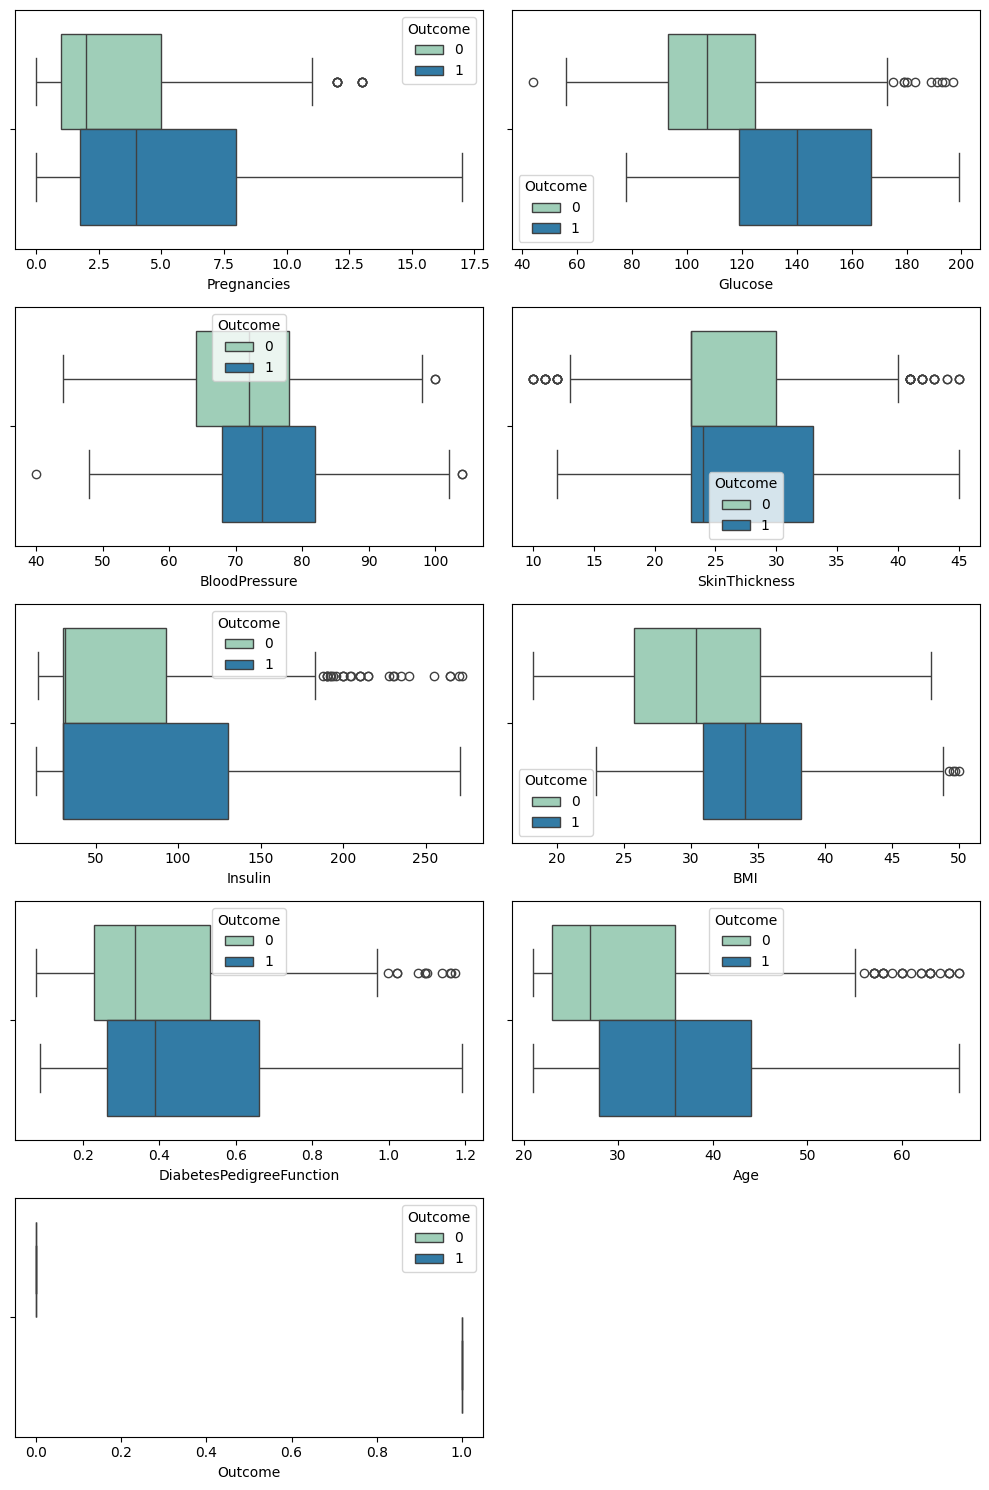

In [14]:
plt.figure(figsize=(10,15))
i=1
for col in df :
    plt.subplot(5,2,i)
    sns.boxplot(data=df,x=col,hue="Outcome",palette="YlGnBu")
    i+=1
plt.tight_layout()
plt.show()

## Model

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(["Outcome","Age"],axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
X.shape

(768, 7)

In [18]:
X_train.shape

(614, 7)

In [19]:
X_test.shape

(154, 7)

## Model Train & Predict

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
model = GaussianNB ()

In [22]:
model.fit(X_train,y_train)

GaussianNB()

In [23]:
y_pred = model.predict (X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [37]:
model_predict = X_test
model_predict["actual"] = y_test
model_predict["prediction"] = y_pred
model_predict.head(5)
model_predict.to_csv("model_predction.csv",index=False)

## Model accuracy

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {int(round(accuracy,2)*100)}%")
print("confusion_matrix")
print(cm)